# 목차
> ## 1. 데이터 확인
> ## 2. 데이터 전처리 및 분석
>> ### 2.1 결측치 확인 및 처리
>> ### 2.2 중복 데이터 검사
>> ### 2.3 감독이 컨텐츠에 미치는 영향
>> ### 2.4 업로드 날짜 분석
> ## 3. 인사이트 도출
>> ### 3.1 넷플릭스 업로드 컨텐츠의 증감 원인
> ## 회고

### 필요한 라이브러리를 import합니다.

In [1]:
import os
from os.path import join
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/aiffel/'

df_data_path = join(data_dir, 'netflix_titles.csv')
df = pd.read_csv(df_data_path)

# 1. 데이터 확인

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


1. show_id : 컨텐츠를 구분하는 ID
2. type : 컨텐츠 유형
3. title : 컨텐츠 제목
4. director : 감독
5. cast : 배우
6. country : 시청가능 국가
7. date_added : 컨텐츠 업로드 날짜
8. release_year : 제작 년도
9. rating : 시청등급
10. duration : 재생시간
11. listed_in : 장르
12. description : 설명

## 2. 데이터 전처리 및 분석

## 결측치를 확인해 보겠습니다.

<AxesSubplot:>

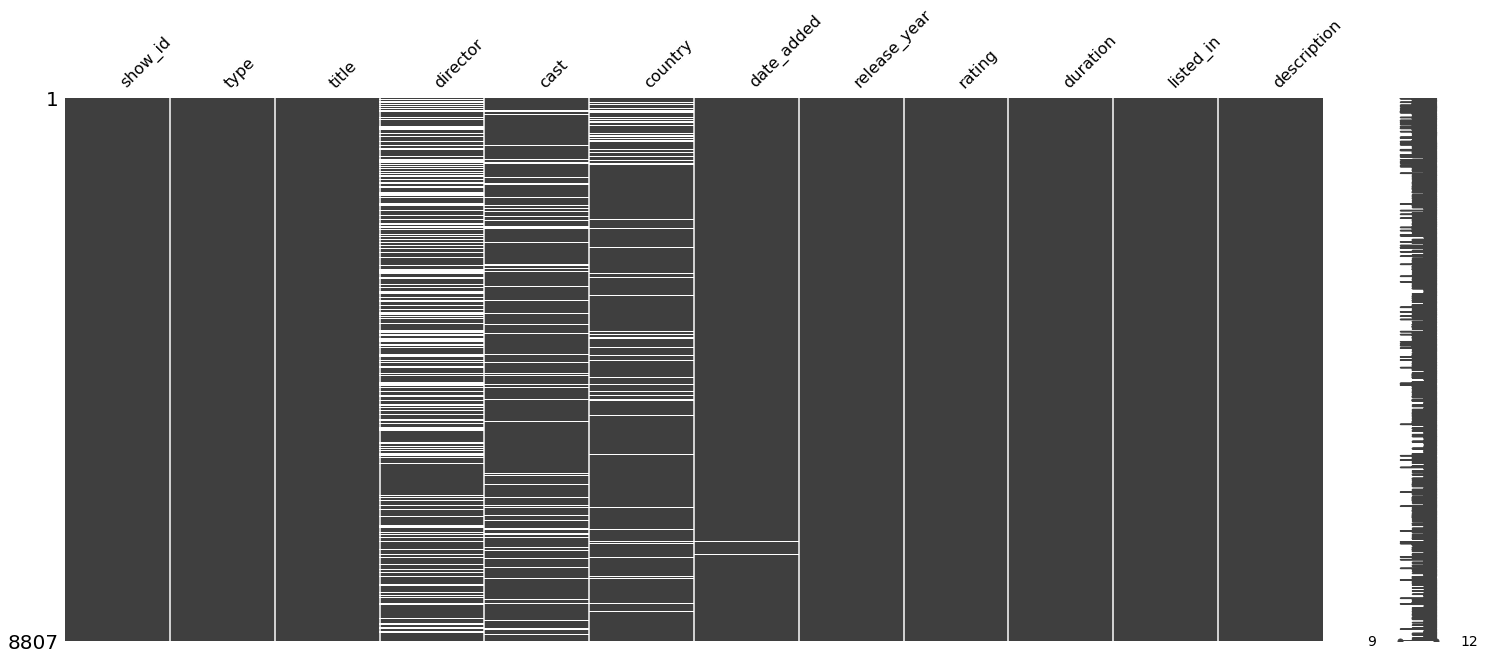

In [4]:
msno.matrix(df)

## 감독과 배우, 국가에서 많아 보이네요. 실제 몇개인지 보겠습니다.

In [5]:
for c in df.columns:
    print('{} : {}'.format(c, len(df.loc[pd.isnull(df[c]), c].values)))

show_id : 0
type : 0
title : 0
director : 2634
cast : 825
country : 831
date_added : 10
release_year : 0
rating : 4
duration : 3
listed_in : 0
description : 0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 중복데이터 확인

In [7]:
df[df.duplicated('title')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


## 제목이 같은 데이터는 없습니다.

### 결측치를 이용해 보다 편리하게 조건을 나누기 위해 모든 결측치를 0으로 만들겠습니다.

In [8]:
df = df.fillna(0)

## 결측치가 가장 많았던 감독을 통해 데이터를 시각화 해보겠습니다.

### 감독이 있는 데이터와 없는 데이터를 따로 만들고 type의 비율을 살펴보겠습니다.

In [9]:
df_has_drector = df.loc[df['director'] != 0]

In [10]:
df_nan_drector = df.loc[df['director'] == 0]

### 전체 데이터에서 movie와 TV show의 비율을 시각화 해보겠습니다.

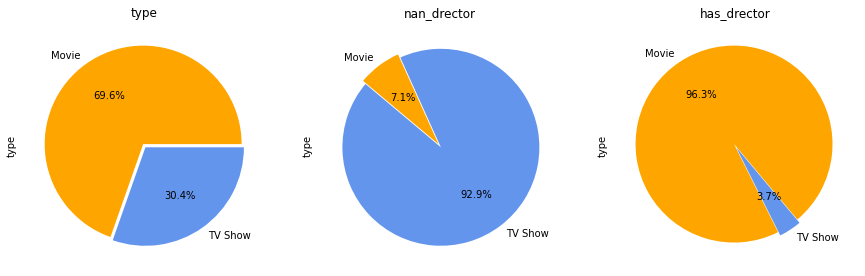

In [11]:
fig, axes = plt.subplots(ncols = 3)
fig.set_size_inches(15,8)
explode=[0.02, 0.02]

df.type.value_counts().plot.pie(autopct='%.1f%%', explode=explode, colors = ['orange', 'cornflowerblue'], title = 'type', ax = axes[0])
df_nan_drector.type.value_counts().plot.pie(autopct='%.1f%%', explode=explode, startangle=140, colors = ['cornflowerblue', 'orange'], title = 'nan_drector', ax = axes[1])
df_has_drector.type.value_counts().plot.pie(autopct='%.1f%%', explode=explode, startangle=-50, colors = ['orange', 'cornflowerblue'], title = 'has_drector', ax = axes[2])

plt.show()

## movie에서 감독이 좀더 중요한것 같습니다.

### 이제 컨텐츠를 많이 등록한 감독을 찾아보겠습니다.

In [12]:
df_has_drector['director'].value_counts()

Rajiv Chilaka                   19
Raúl Campos, Jan Suter          18
Marcus Raboy                    16
Suhas Kadav                     16
Jay Karas                       14
                                ..
Scott Aukerman                   1
James Watkins                    1
Louis Leterrier                  1
Paul Berczeller, Mark Radice     1
Heber Cannon                     1
Name: director, Length: 4528, dtype: int64

### 컨텐츠를 19개나 만든 감독이 있네요. 무슨 컨텐츠을 만들었나 검색해보겠습니다.

In [13]:
df.loc[(df['director'] == 'Rajiv Chilaka')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",0,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",0,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",0,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",0,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",0,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",0,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",0,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",0,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,..."


### 애니메이션을 시리즈로 만들었습니다.

### 감독이 컨텐츠에 미치는 영향에 대해 분석 해보고 싶었는데 유의미한 데이터는 아닌것 같고 결측치도 많아 업로드 날짜로 분석해 보겠습니다.

## 업로드 날짜에서 결측치 데이터를 보겠습니다.

In [14]:
df.loc[df['date_added'] == 0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,0,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,0,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,0,Anthony Bourdain,United States,0,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,0,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,0,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,0,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,0,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,0,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,0,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,0,Igor Dmitriev,0,0,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,0,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,0,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,0,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,0,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,0,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,0,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,0,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,0,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


## 10개뿐이라 삭제하고 시작하겠습니다.

In [15]:
df = df.loc[df['date_added'] != 0]

### 연도, 월, 일로 나눠서 분석해보겠습니다.

In [16]:
df["date_added"] = df["date_added"].str.strip()

In [17]:
df['month'] = df.date_added.str.split(' ').str[0]

### 잘 나눠졌나 확인해보겠습니다.

In [18]:
df['month'].value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: month, dtype: int64

### 영어보다 숫자가 직관적이라 생각해 숫자로 바꾸겠습니다.

In [19]:
df = df.replace({'month': {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}})

In [20]:
df['month'].value_counts()

7     827
12    813
9     770
4     764
10    760
8     755
3     742
1     738
6     728
11    705
5     632
2     563
Name: month, dtype: int64

In [22]:
df['day'] = df.date_added.str.split(' ').str[1]

In [23]:
df["day"] = df["day"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df['day'].value_counts()

1     2212
15     687
2      325
16     289
31     274
20     249
19     243
5      231
22     230
10     214
6      210
30     210
18     207
26     206
8      201
14     198
25     197
27     195
7      194
21     193
28     190
23     184
12     181
17     180
4      175
13     175
24     159
3      151
11     149
9      147
29     141
Name: day, dtype: int64

In [24]:
df['year'] = df.date_added.str.split(',').str[1]

In [25]:
df['year'].value_counts()

 2019    2016
 2020    1879
 2018    1649
 2021    1498
 2017    1188
 2016     429
 2015      82
 2014      24
 2011      13
 2013      11
 2012       3
 2008       2
 2009       2
 2010       1
Name: year, dtype: int64

In [26]:
df = df.astype({'month': int, 'day': int, 'year': int})

## 모두 잘 나뉘었고 업로드 날짜를 지우겠습니다.

In [27]:
del df['date_added']

### 2021년은 끝나지 않아 데이터 분석에 방해가 된다고 생각해 제외 하겠습니다.

In [76]:
df = df.loc[df['year'] != 2021]

In [77]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,day,year,half,quarters
1470,s1471,Movie,Alaska Is a Drag,Shaz Bennett,"Martin L. Washington Jr., Maya Washington, Mat...",United States,2017,TV-MA,83 min,"Dramas, LGBTQ Movies","Tormented by bullies, an aspiring drag star wo...",12,31,2020,second_half,4_quarter
1471,s1472,Movie,Best of Stand-Up 2020,0,"Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...",0,2020,TV-MA,77 min,Stand-Up Comedy,"From Jerry Seinfeld to Leslie Jones, Kevin Har...",12,31,2020,second_half,4_quarter
1472,s1473,Movie,Bobby Jasoos,Samar Shaikh,"Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...",India,2014,TV-14,116 min,"Comedies, Dramas, International Movies",With unlimited determination and zero field ex...,12,31,2020,second_half,4_quarter
1473,s1474,TV Show,Chilling Adventures of Sabrina,0,"Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...",United States,2020,TV-14,4 Seasons,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","Magic and mischief collide as half-human, half...",12,31,2020,second_half,4_quarter
1474,s1475,Movie,Tarung Sarung,Archie Hekagery,"Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...",Indonesia,2020,TV-PG,116 min,"Action & Adventure, Dramas, Faith & Spirituality","Wealthy and spoiled, a young man finds somethi...",12,31,2020,second_half,4_quarter


## 월별로 업로드된 동영상 수를 확인해 보겠습니다.

### movie와 TV show를 나눠서 확인해보겠습니다.

In [78]:
movie = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']

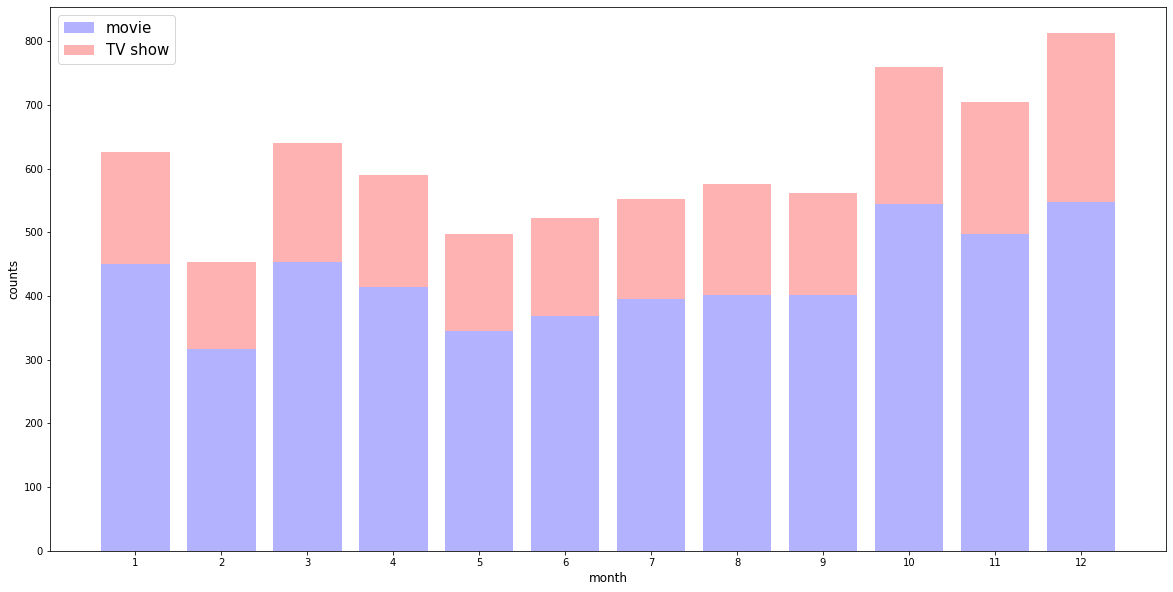

In [79]:
plt.figure(figsize=(20,10))
bar_df_movie = movie["month"].value_counts().reset_index()
bar_df_tv_show = tv_show["month"].value_counts().reset_index()
#plt.title("월별 업로드 동영상", fontsize=20)
p1 = plt.bar(bar_df_movie["index"], bar_df_movie["month"],color='b', alpha=.3)
p2 = plt.bar(bar_df_movie["index"], bar_df_tv_show["month"],color='r', alpha=.3, bottom = bar_df_movie["month"])
plt.ylabel("counts", fontsize=12)
plt.xlabel("month", fontsize=12)
plt.legend((p1[0], p2[0]), ('movie', 'TV show'), fontsize=15)
plt.xticks(list(i for i in range(1,13)))
plt.show()

### 월말로 갈수록 업데이트 된 컨텐츠가 많습니다.

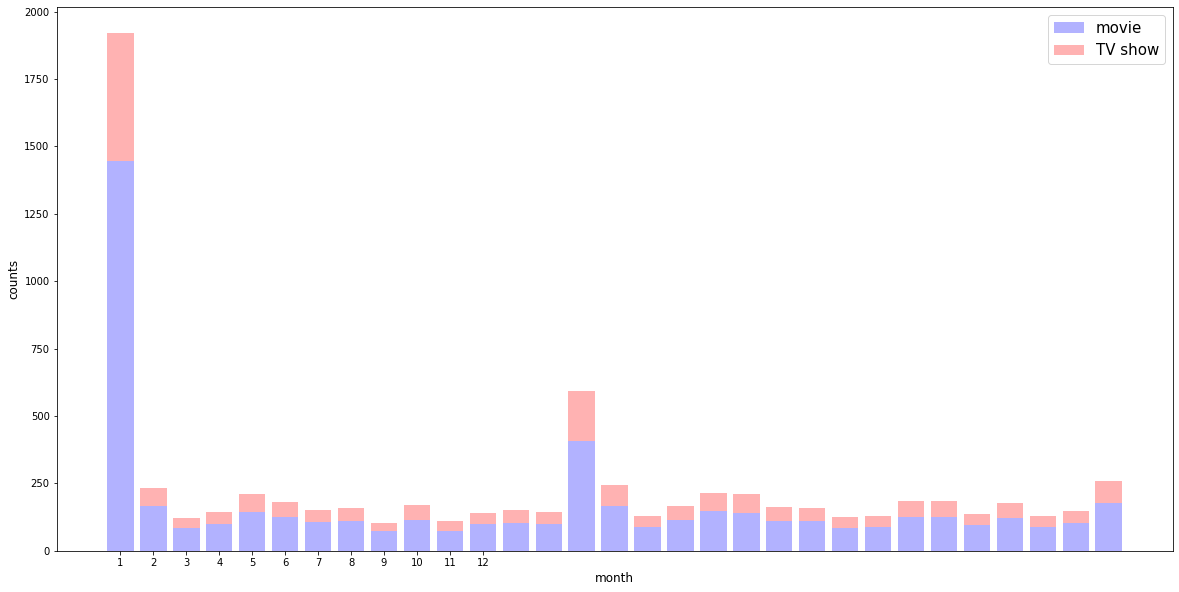

In [80]:
plt.figure(figsize=(20,10))
bar_df_movie = movie["day"].value_counts().reset_index()
bar_df_tv_show = tv_show["day"].value_counts().reset_index()
#plt.title("월별 업로드 동영상", fontsize=20)
p1 = plt.bar(bar_df_movie["index"], bar_df_movie["day"],color='b', alpha=.3)
p2 = plt.bar(bar_df_movie["index"], bar_df_tv_show["day"],color='r', alpha=.3, bottom = bar_df_movie["day"])
plt.ylabel("counts", fontsize=12)
plt.xlabel("month", fontsize=12)
plt.legend((p1[0], p2[0]), ('movie', 'TV show'), fontsize=15)
plt.xticks(list(i for i in range(1,13)))
plt.show()

### day는 1일이 가장 많았고 이것은 넷플릭스의 내부사정인것 같습니다.

## 이제 상반기, 하반기로 나눠서 확인해 보겠습니다.

In [45]:
df['half'] = ['first_half' if t else 'second_half' for t in list(df['month'] <= 6)]

In [46]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,day,year,half
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,25,2021,second_half
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,24,2021,second_half
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,24,2021,second_half
3,s4,TV Show,Jailbirds New Orleans,0,0,0,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,24,2021,second_half
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,24,2021,second_half


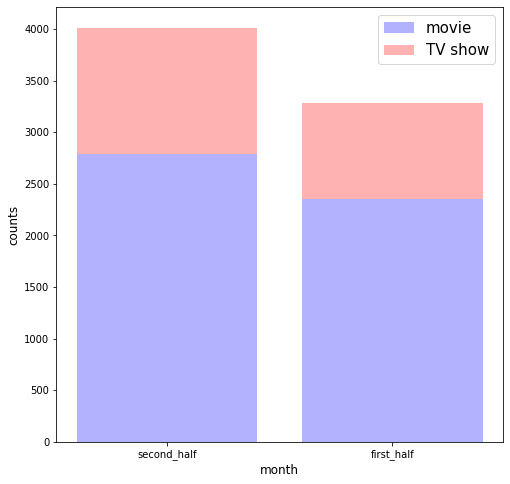

In [81]:
plt.figure(figsize=(8,8))
bar_df_movie = movie["half"].value_counts().reset_index()
bar_df_tv_show = tv_show["half"].value_counts().reset_index()
#plt.title("월별 업로드 동영상", fontsize=20)
p1 = plt.bar(bar_df_movie["index"], bar_df_movie["half"],color='b', alpha=.3)
p2 = plt.bar(bar_df_movie["index"], bar_df_tv_show["half"],color='r', alpha=.3, bottom = bar_df_movie["half"])
plt.ylabel("counts", fontsize=12)
plt.xlabel("month", fontsize=12)
plt.legend((p1[0], p2[0]), ('movie', 'TV show'), fontsize=15)
plt.show()

### 하반기에 좀더 업데이트된 컨텐츠가 많습니다.

## 분기별로 나눠보겠습니다.

In [82]:
conditionlist = [
    (df['month'] <= 3) ,
    (df['month'] <= 6) & (df['month'] >3),
    (df['month'] <= 9) & (df['month'] >6),
    (df['month'] <= 12) & (df['month'] >9)]
choicelist = ['1_quarter', '2_quarter', '3_quarter', '4_quarter']
df['quarters'] = np.select(conditionlist, choicelist, default='Not Specified')

In [83]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,day,year,half,quarters
1470,s1471,Movie,Alaska Is a Drag,Shaz Bennett,"Martin L. Washington Jr., Maya Washington, Mat...",United States,2017,TV-MA,83 min,"Dramas, LGBTQ Movies","Tormented by bullies, an aspiring drag star wo...",12,31,2020,second_half,4_quarter
1471,s1472,Movie,Best of Stand-Up 2020,0,"Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...",0,2020,TV-MA,77 min,Stand-Up Comedy,"From Jerry Seinfeld to Leslie Jones, Kevin Har...",12,31,2020,second_half,4_quarter
1472,s1473,Movie,Bobby Jasoos,Samar Shaikh,"Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...",India,2014,TV-14,116 min,"Comedies, Dramas, International Movies",With unlimited determination and zero field ex...,12,31,2020,second_half,4_quarter
1473,s1474,TV Show,Chilling Adventures of Sabrina,0,"Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...",United States,2020,TV-14,4 Seasons,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","Magic and mischief collide as half-human, half...",12,31,2020,second_half,4_quarter
1474,s1475,Movie,Tarung Sarung,Archie Hekagery,"Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...",Indonesia,2020,TV-PG,116 min,"Action & Adventure, Dramas, Faith & Spirituality","Wealthy and spoiled, a young man finds somethi...",12,31,2020,second_half,4_quarter


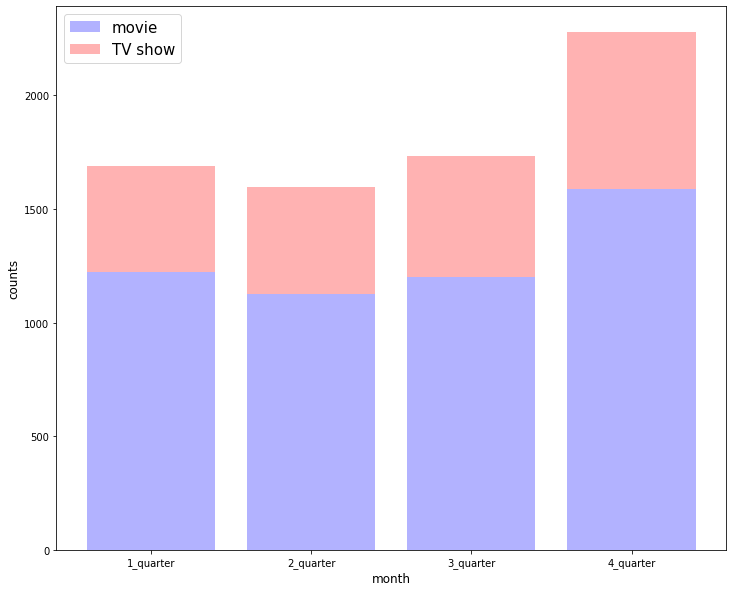

In [84]:
plt.figure(figsize=(12,10))
bar_df_movie = movie["quarters"].value_counts().reset_index().sort_values(by=['index'], axis=0)
bar_df_tv_show = tv_show["quarters"].value_counts().reset_index().sort_values(by=['index'], axis=0)
p1 = plt.bar(bar_df_movie["index"], bar_df_movie["quarters"],color='b', alpha=.3)
p2 = plt.bar(bar_df_movie["index"], bar_df_tv_show["quarters"],color='r', alpha=.3, bottom = bar_df_movie["quarters"])
plt.ylabel("counts", fontsize=12)
plt.xlabel("month", fontsize=12)
plt.legend((p1[0], p2[0]), ('movie', 'TV show'), fontsize=15)
plt.show()

### 분기별로 다시 보니 확실히 월말로 갈수록 업데이트된 컨텐츠가 많다고 생각합니다.

## 전체적인 년도별 업로드된 컨텐츠를 시각화 해보겠습니다.

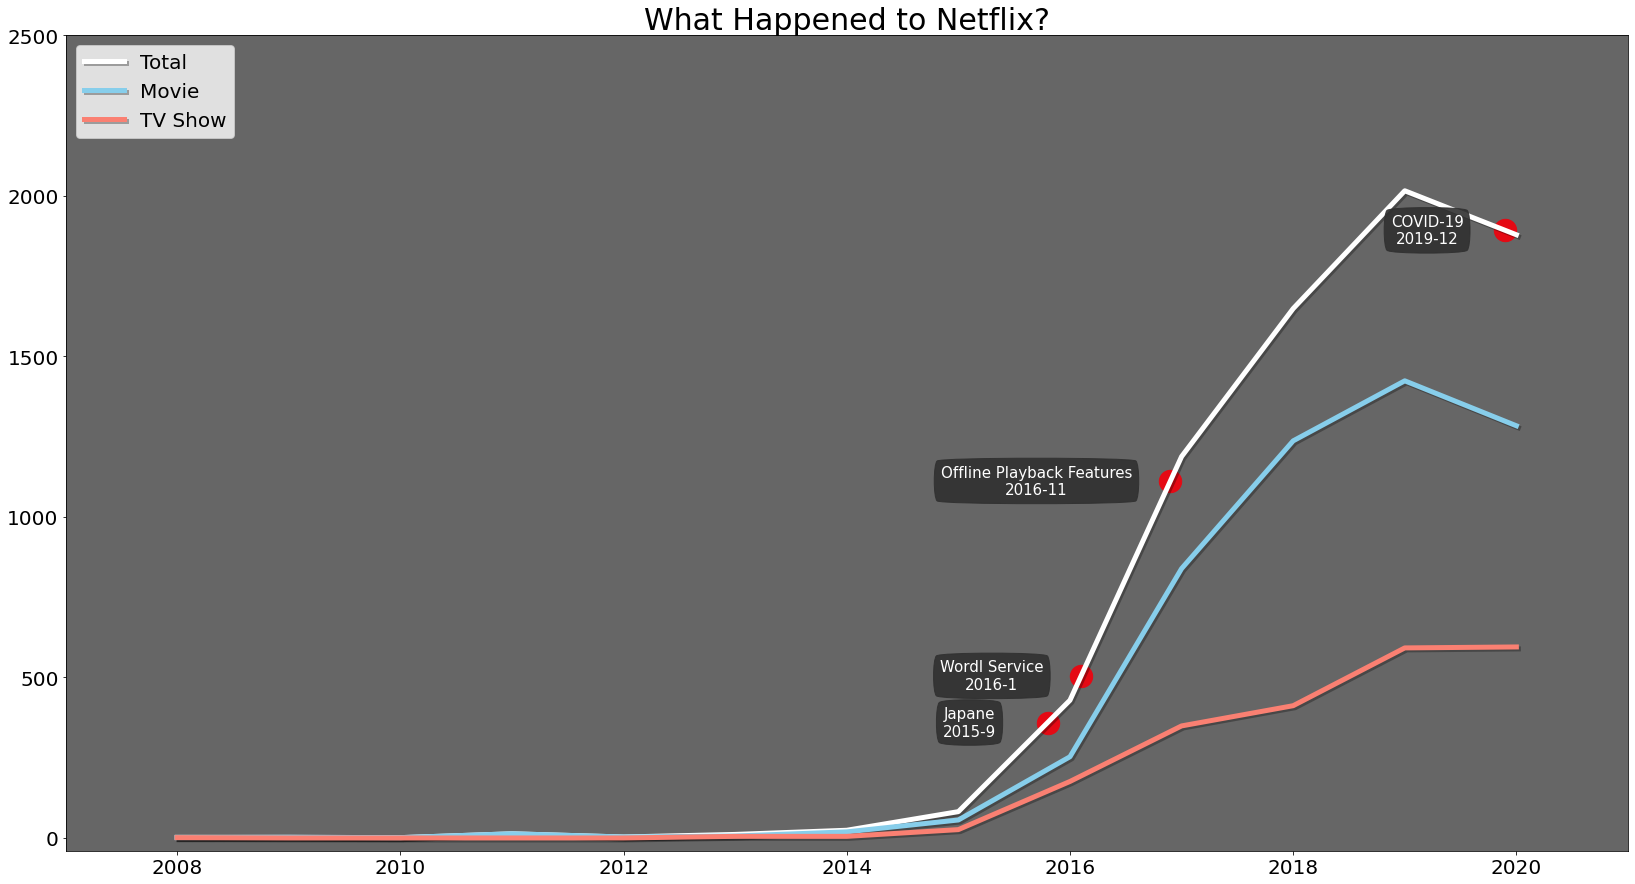

In [51]:
movie = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']

year_data = df['year'].value_counts().sort_index().loc[:2020]
type_data = df.groupby('type')['year'].value_counts().sort_index().unstack().fillna(0).T.loc[:2020] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

events = ["Japane\n2015-9", "Wordl Service\n2016-1", "Offline Playback Features\n2016-11", "COVID-19\n2019-12"]

t = [2015.8, 2016.1, 2016.9, 2019.9]

up_down = [0, 0, 0, 0]

left_right = [-0.7, -0.8, -1.2, -0.7]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=15,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.9))
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=500)
    
ax.set_xlim(2007, 2021)
ax.set_ylim(-40, 2500)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("What Happened to Netflix?", fontsize=30)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

### 2016~2017년 업로드된 컨텐츠의 증가율이 가장 크게 나타났습니다. 이는 일본진출과 월드서비스 시작이 겹치면서 가장 크게 나타난것 같습니다. 
### 그리고 2019년까지는 꾸준히 증가했고 그 사이에 오프라인 동영상 재생을 모든 유저에서 서비스한 것도 영향이 있는것 같습니다.
### 마지막으로 2020년 업로드된 컨텐츠의 개수가 많이 낮은것은 코로나의 영향으로 제작된 TV show나 movie가 적어서 그렇다고 생각합니다.

## 년도와 월별로 나눠서 시각화 해보겠습니다.

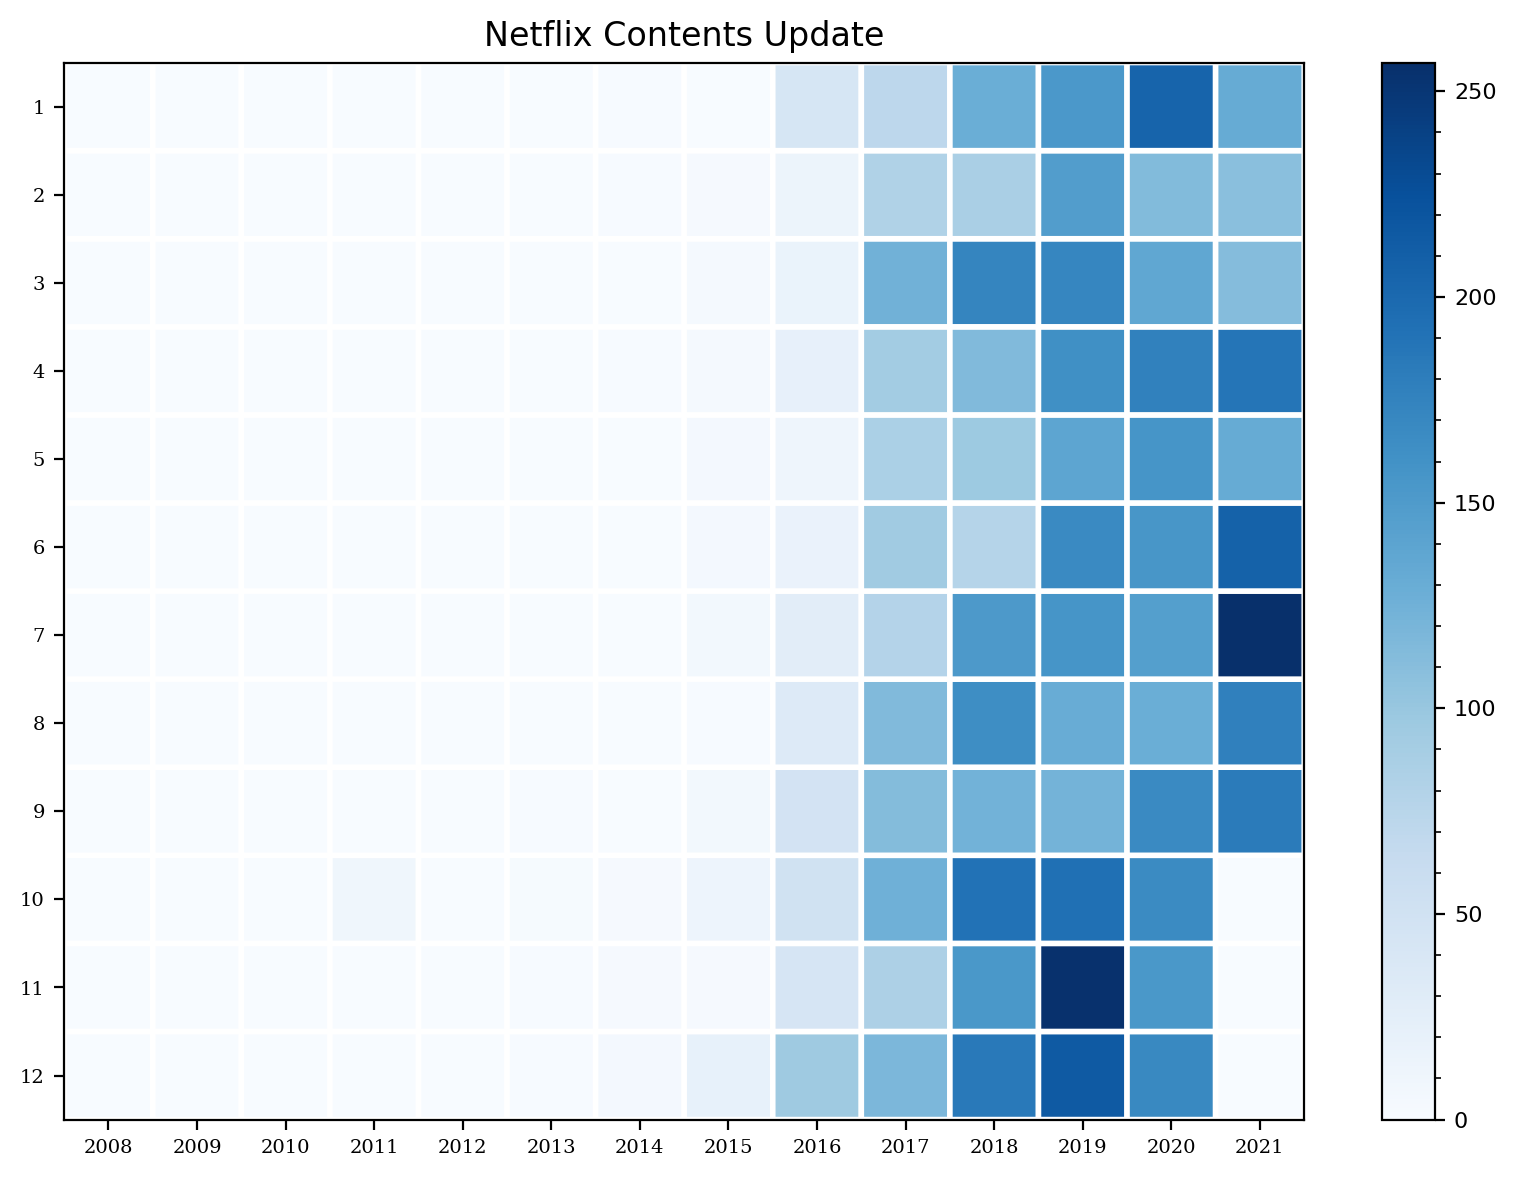

In [70]:
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12][::-1]
df2 = df.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df2, cmap='Blues', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df2.columns), 1), df2.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df2.index), 1), df2.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12)
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

### 년도별로 보면 하반기에 좀더 업데이트가 활발하다고 생각합니다.

# 3. 인사이트 도출
> ### 1. 가장 많은 컨텐츠를 만든 감독
> ### 2. 월별, 일별, 년도별 업데이트된 컨텐츠의 수

## 회고
> #### 이번 데이터로 분석하고 싶은 것은 많았지만 시간과 실력이 부족하여 다 분석하지 못한게 아쉽습니다.
> #### 첫번째로 제목과 장르를 학습하여 제목으로 장르를 맞추는 인공지능 모델을 생각해 보았는데 장르를 나누고 분류하여 학습할 엄두가 안나 <br/>다른쪽으로 생각해 보았습니다.<br/>그리고 감독과 배우 누가 더 컨텐츠에 영향이 많은지 분석하고 싶었는데 결측치도 많고 잘못된 데이터도 있어 결과적으로 업로드된 컨텐츠의 증감의 원인이 무엇일지 찾아보게 되었습니다.
> #### 이렇게 분석하는 과정에서 좋다고 생각하는 메서드도 발견했고 코딩능력이 부족해 공부하는 시간도 필요해서 많이 분석하지 못한게 아쉬웠습니다.